# IE 6318 : Data Mining and Analytics Final Project
## Topic : Telcom company churn prediction

### Team Members :
-  
#### YASH SHINGE : 1001665172
-  
#### RUSHANK ARUNKUMAR : 1001558124

In [1]:
#SETTING WORKING DIRECTORY 
import os
path = 'C:/Users/Yash Shinge/Documents/DataMiningProject'
os.getcwd()
os.chdir(path)

In [2]:
# required libraries

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from PIL import  Image
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("TelcomData.csv")

**First we take a look at the first few and last few rows of the data**

In [4]:
pd.options.display.max_columns = None
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [5]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

# Data Preprocessing

**Now, we check the total number of rows and columns in the data**

In [6]:
print ("\nNumber of rows in the data : ", data.shape[0])
print ("\nNumber of columns in the data : ", data.shape[1])



Number of rows in the data :  7043

Number of columns in the data :  21


**Further, we check if the data has any missing values**

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**As we can see, none of the columns has missing data.** 

In [8]:
data.dtypes
            

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**We can see, the  datatype of TotalCharges is 'object', instead of 'float64'.  It means there's some value which isn't a number.
We need to fix it before moving further**

In [9]:
print(data['TotalCharges'].describe())

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object


**We can see, top value is " " , i.e blank space, we replace it with NaN.**

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)


In [11]:
data['TotalCharges'].isnull().sum()

11

**We can see, only 11 from 7043 rows are missing, i.e. only 0.156 % of whole data.
Thus, there's no harm in removing these rows from the dataset.**

In [12]:
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

__Finally we change the 'object' datatype of TotalCharges to 'float64'__

In [13]:
data['TotalCharges'] = data["TotalCharges"].astype(float)
data['TotalCharges'].dtype

dtype('float64')

**Now, we change 'int64' datatype of Senior Citizen column by changing 0 to 'No' and 1 to 'Yes', as Senior citizen here, is a categorical variable**


In [14]:
data['SeniorCitizen']  = data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


In [15]:
print("\nNumber of rows: ",data.shape[0])


Number of rows:  7032


__Moving forward, as seen in the data description , the columns  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',and  'StreamingMovies' have a category 'No internet service' which is as same as the category 'No'.
Thus, we replace it with 'No'__

In [16]:
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in cols_internet : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

In [17]:
data['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

**'tenure' is a continuous variable denoting the duration of months of service. It would be easy for us to proceed if we grouped certain number of months together, i.e make 5 groups, each containing 12 months, which adds up to 72 which is the maximum number of months.
In short, we are converting continuous variable to categorical variable with different groups of months as categories.**

In [18]:
def tenure_grouping(data):
    if data['tenure'] <= 12:
        return 'tenure_group_0to12'
    elif (data['tenure'] > 12) & (data['tenure'] <= 24):
        return 'tenure_group_12to24'
    elif (data['tenure'] > 24) & (data['tenure'] <= 36):
        return 'tenure_group_24to36'
    elif (data['tenure'] > 36) & (data['tenure'] <= 48):
        return 'tenure_group_36to48'
    elif (data['tenure'] > 48) & (data['tenure'] <= 60):
        return 'tenure_group_48to60'
    elif data['tenure']  > 60:
        return 'tenure_group_60to72'

data["tenure_in_groups"] = data.apply(lambda data:tenure_grouping(data),axis = 1)
                                 

**Now, we separate the numerical variables and the categorical variables. 
For this, we display the datatypes of the columns**

In [19]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_in_groups     object
dtype: object

In [20]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_cols = [ i for i in data.columns.tolist() if (i not in num_cols) and (i != 'customerID' and i !='Churn')]


**Finally we separate the Yes and No classes of Churn**

In [21]:
not_churn = data[data["Churn"] == "No"]
churn     = data[data["Churn"] == "Yes"]


## Data Visualizations

In [22]:
trace = go.Pie(labels = ['Churn', 'Not Churn'] ,
               values = [churn.shape[0], not_churn.shape[0]],
               textfont=dict(size=25),
               marker = dict(colors =  [ 'red' ,'blue'],
                             line = dict(color = "black",
                                         width =  3)
                            ),
               hoverinfo = "label+value+text",
              )
layout = go.Layout(dict(dict(title = "Customer distribution" ,font=dict(
                family='sans-serif',size=25)),legend=dict(x=.8, y=1, font=dict(family='sans-serif',size=20)),
                        plot_bgcolor  = "rgb(243,243,243)",
                        )
                  )
                      
                  
pieD = [trace]
fig = go.Figure(data = pieD,layout = layout)
py.iplot(fig)

**For numerical variable, we plot a scatter plot to see their relation.**

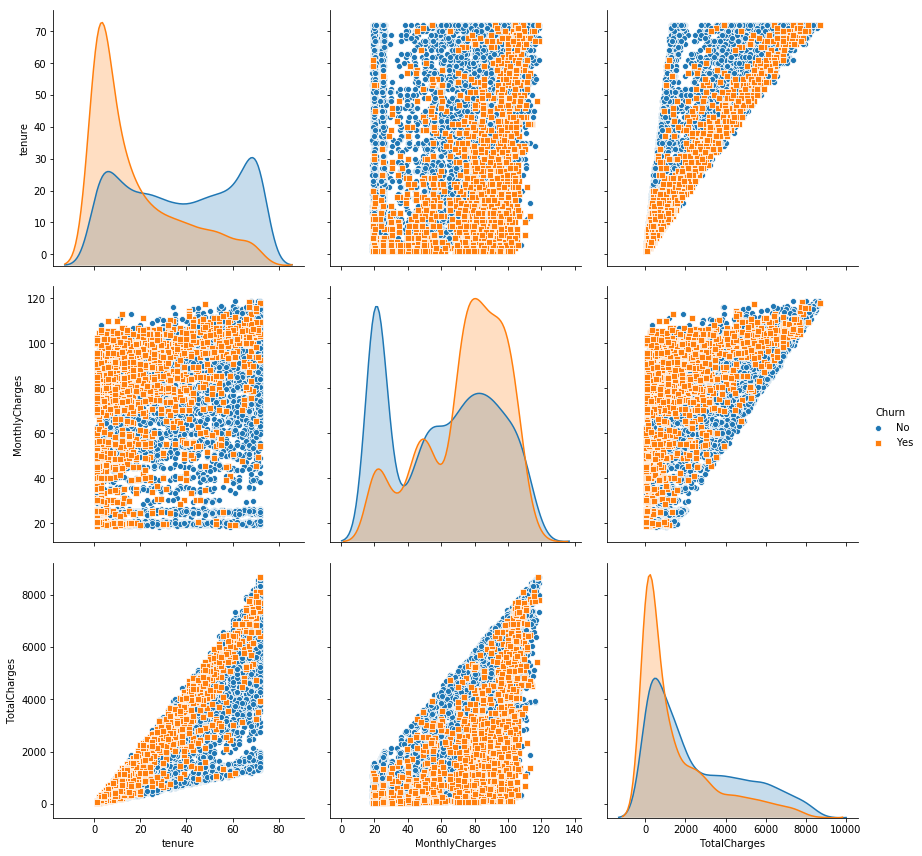

In [23]:
sns.pairplot(data = data,hue = 'Churn', markers=["o", "s"], diag_kind = 'kde', size=4)


In [24]:
def histogram(column) :
    
    churnBar = go.Histogram(x  = churn[column],
                          histnorm= "percent", xbins=dict(size=0.2),
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    ), color = 'red'))
                          
    notchurnBar = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             ), color = 'blue'))
                           
    
    histos = [churnBar,notchurnBar]
    layout = go.Layout(dict(title =column + " distribution ", width = 650,margin = dict(b = 100),
                            xaxis = dict(title = column), yaxis = dict(title = 'Percentage')))
                         
    fig  = go.Figure(data=histos,layout=layout)
    
    py.iplot(fig)



for i in cat_cols :
    histogram(i)

## Conversion of categorical variables

In [25]:
data1 = data.copy()
#Drop tenure_in_ column
data = data.drop(columns = "tenure_in_groups",axis = 1)

In [26]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_cols = [ i for i in data.columns.tolist() if (i not in num_cols) and (i != 'customerID' and i !='Churn')]


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Binary columns with 2 values
binary_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#Label encoding Binary columns
le = LabelEncoder()
for i in binary_cols :
    data[i] = le.fit_transform(data[i])
    

#Columns more than 2 values
multiple_cols = [i for i in cat_cols if i not in binary_cols]

#Duplicating columns for multiple value columns
data = pd.get_dummies(data = data,columns = multiple_cols )


In [28]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
data2= data.copy()
data = data.drop(columns = num_cols,axis = 1)


data = data.merge(scaled,left_index=True,right_index=True,how = "left")


## Correlation Matrix for the whole dataset

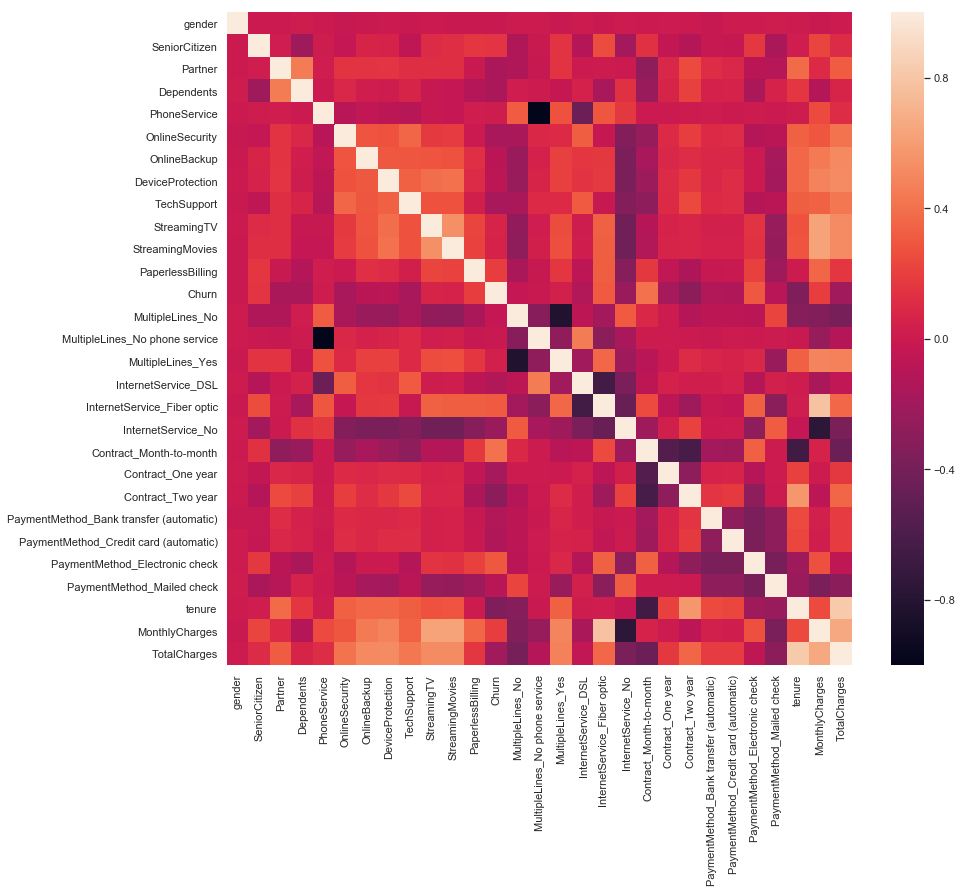

In [29]:
# calculate the correlation matrix
corr = data.corr()
sns.set(rc={'figure.figsize':(14,12)})
# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)


# Modelling

### Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score


In [31]:
Y= data['Churn']
X = data.drop('Churn', axis = 1)
X = X.drop('customerID', axis = 1)
Xcols = [i for i in X.columns] 

In [32]:
X_train ,X_test, Y_train , Y_test = train_test_split(X,Y,test_size = .25 ,random_state = 111)
  

In [33]:
#-----------------------------------function for Predictions and Feature Importances ------------------------------------------#

def prediction_and_featureImportances(algo,trainX,testX,
                             trainY,testY,Xcols,cf) :
    

    algo.fit(trainX,trainY)
    preds   = algo.predict(testX)
    probabilities = algo.predict_proba(testX)
    
    column_df     = pd.DataFrame(Xcols)
    
    
    print (algo)
    print('-----------------------------------------------------------------------------')
    
    print ("\n Classification report : \n",classification_report(testY,preds))
    
    print('-----------------------------------------------------------------------------')
    print ("Accuracy   Score : ",accuracy_score(testY,preds))
           
    
    aucroc = roc_auc_score(testY,preds) 
    print ("Area under curve : ",aucroc,"\n")
    fpr,tpr,thresholds = roc_curve(testY,probabilities[:,1])
    
    print('-----------------------------------------------------------------------------')  
    
    
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algo.coef_.ravel())
        coeff_summary    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
        coeff_summary.columns = ["coefficients","features"]
        coeff_summary    = coeff_summary.sort_values(by = "coefficients",ascending = False)
    
        print('\nFeature Importance\n')
        print(coeff_summary)
        
    elif cf == "features" :
        coefficients  = pd.DataFrame(algo.feature_importances_)
        coeff_summary    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
        coeff_summary.columns = ["coefficients","features"]
        coeff_summary    = coeff_summary.sort_values(by = "coefficients",ascending = False)
    
        print('\nFeature Importance\n')
        print(coeff_summary)
    
    elif cf == None :
        pass 
    
    
    
    print('-----------------------------------------------------------------------------')  
    
    #confusion matrix
    cm = confusion_matrix(testY,preds)
    
    fig1 = plt.figure(figsize=(10,7))
    heatmap = sns.heatmap(cm, annot=True, fmt="d",annot_kws={"size": 30})
    heatmap.yaxis.set_ticklabels( ["Not churn","Churn"], rotation=0, ha='right', fontsize=20)
    heatmap.xaxis.set_ticklabels( ["Not churn","Churn"], rotation=45, ha='right', fontsize=20)
    plt.ylabel('Actual values',fontsize=20)
    plt.xlabel('Predicted values',fontsize=20)
    plt.title('Confusion Matrix',fontsize=30)
    plt.show(fig1)

    print('-----------------------------------------------------------------------------')  
    

    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(aucroc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #subplots

    fig = tls.make_subplots(rows=1, cols=1)
   
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,1)
    
    fig['layout'].update(showlegend=False, title="Receiver Operating Characteristics" ,
                         autosize = False,width=700,height=500,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         
                         margin = dict(b = 70))
    fig["layout"]["xaxis1"].update(dict(title = "False Positive Rate"))
    fig["layout"]["yaxis1"].update(dict(title = "True Positive Rate"))
    
   
    py.iplot(fig)
    
#______________________________________________________________________________________________________________________________#


#------------------------------------------function for Model Performance Report ----------------------------------------------#
    
from sklearn.metrics import f1_score

def model_performance_report(model,trainX ,testX, trainY, testY, AlgoName) :
    
    model.fit(trainX ,trainY)  
    predictions  = model.predict(testX)
    accuracy     = accuracy_score(testY,predictions)
    recallscore  = recall_score(testY,predictions)
    precision    = precision_score(testY,predictions)
    aucroc      = roc_auc_score(testY,predictions)
    f1score      = f1_score(testY,predictions) 
   
    
    mReport = pd.DataFrame({"Model"           : [AlgoName],
                            "Accuracy_score"  : [accuracy],
                            "AUC_ROC": [aucroc],
                            "Precision"       : [precision],
                            "Recall_score"    : [recallscore],
                            "f1_score"        : [f1score],
                            })
    return mReport

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.83      0.90      0.87      1268
          1       0.68      0.54      0.60       490

avg / total       0.79      0.80      0.79      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.8003412969283277
Area under curve :  0.7194714478851477 

-----------------------------------------------------------------------------

Feature Importance

    coefficients                                 features
27      0.621926                             TotalCharges
18      0.445518                  Contrac

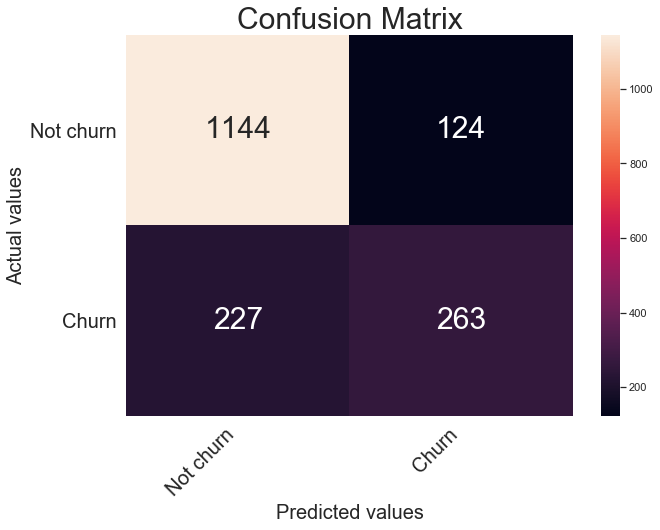

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [34]:
logReg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

prediction_and_featureImportances(logReg,X_train,X_test,Y_train,Y_test,
                        Xcols,"coefficients")


model1 = model_performance_report(logReg,X_train,X_test,Y_train,Y_test, "Logistic Regression")



# Handling the imbalanced data with SMOTE 

Here, the number of Non- churn values are much larger than the churn values. 
This causes the problem of overfitting. 
Also, we may face the problem of Accuracy Paradox.
To overcome this, we can perform sampling methods.
There are two types of sampling methods, 1)Undersampling and 2)Oversampling.
-  1) Undersampling: It is mostly done when the dataset is very large. 
    Here, our dataset is of moderate size, hence it is not advisable to perform undersampling.
-  2) Oversampling : 
      It can be done in two methods: 
    -  i) Random Oversampling. 
    -  ii) SMOTE (Synthetic Minority Oversampling Technique.
    Random Oversampling is the process of duplicating the existing data of minority class, but drawback of this technique is,       it again leads to overfitting. 
-  **SMOTE**: This is the most suitable method. It synthetically generates samples of minority class in between the spacial locations of the existing features, thus creating new data points to avoid overfitting

In [35]:
Y_train.value_counts()


0    3895
1    1379
Name: Churn, dtype: int64

**We can see, the number of non-churn customers 0's is almost 3 times the number of churn customers 1's.**

**Thus, we perform SMOTE as planned**

In [36]:
from imblearn.over_sampling import SMOTE

over_sample = SMOTE(random_state = 0)
X_train_smote,Y_train_smote = over_sample.fit_sample(X_train,Y_train)

X_train_smote = pd.DataFrame(data = X_train_smote,columns= Xcols)
Y_train_smote = pd.Series(Y_train_smote)

Y_train_smote.value_counts()

1    3895
0    3895
dtype: int64

**Hence, we have successfully added samples of minority class to deal with the class imbalance problem.**
**Now we perform logistic regression on the oversampled dataset.**

# Logistic Regression with SMOTE

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.90      0.75      0.82      1268
          1       0.55      0.79      0.65       490

avg / total       0.80      0.76      0.77      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.7605233219567691
Area under curve :  0.769503637417112 

-----------------------------------------------------------------------------

Feature Importance

    coefficients                                 features
27      0.949386                             TotalCharges
18      0.668403                  Contract

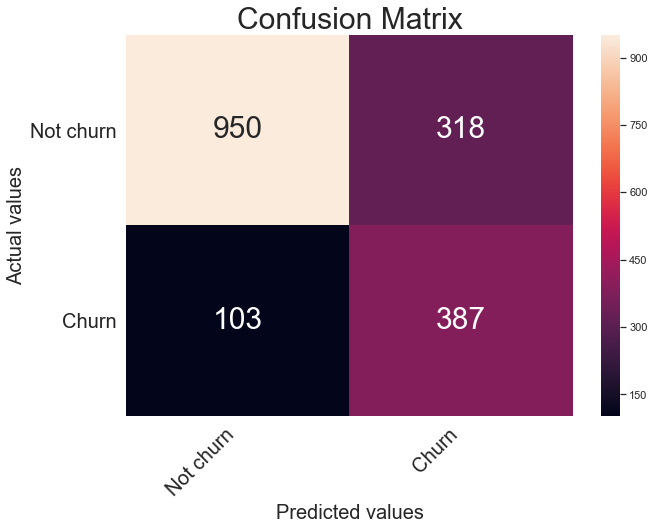

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [37]:
logReg_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


prediction_and_featureImportances(logReg_smote,X_train_smote ,X_test ,Y_train_smote ,Y_test, Xcols,"coefficients")

model2 = model_performance_report(logReg_smote,X_train_smote ,X_test ,Y_train_smote ,Y_test, "Logistic Regression SMOTE")

# K- Nearest Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.86      0.69      0.76      1268
          1       0.47      0.71      0.56       490

avg / total       0.75      0.69      0.71      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.6939704209328783
Area under curve :  0.6989506212579669 

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


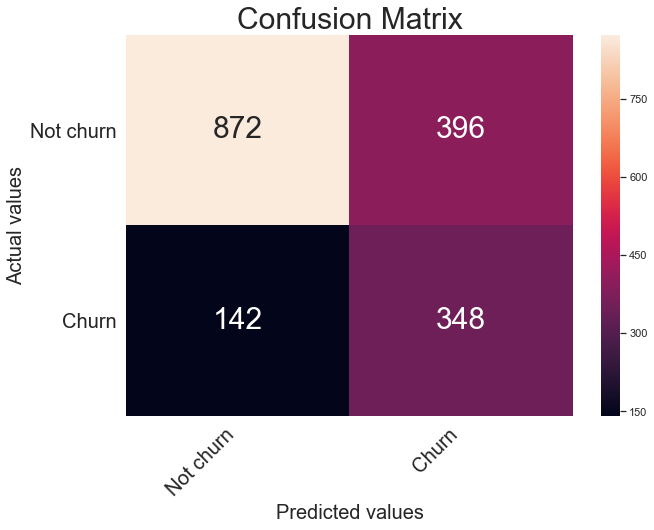

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


prediction_and_featureImportances(knn, X_train_smote ,X_test ,Y_train_smote ,Y_test, Xcols, None)

model3 = model_performance_report(knn, X_train_smote ,X_test ,Y_train_smote ,Y_test, "K-NN")

# Naïve Bayes

GaussianNB(priors=None)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.90      0.74      0.81      1268
          1       0.54      0.79      0.64       490

avg / total       0.80      0.75      0.77      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.7542662116040956
Area under curve :  0.7657921843816391 

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


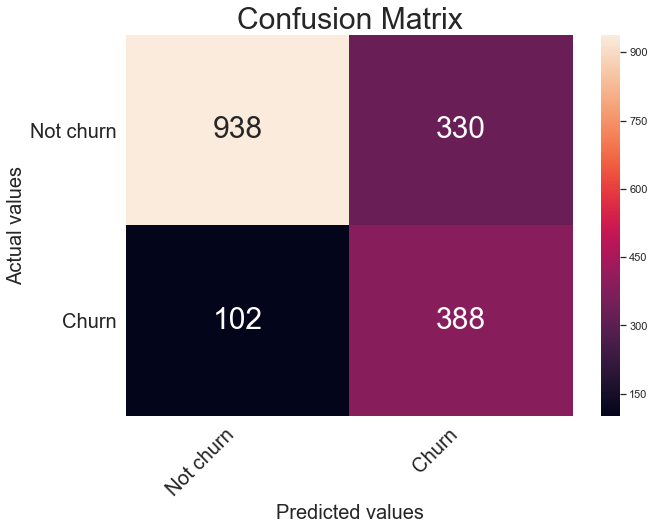

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [39]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB(priors=None)

prediction_and_featureImportances(naiveBayes, X_train_smote ,X_test ,Y_train_smote ,Y_test, Xcols, None)

model4 = model_performance_report(naiveBayes, X_train_smote ,X_test ,Y_train_smote ,Y_test, "Naïve Bayes")

# Support Vector Machines

-  
### Using Linear hyperplane

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.91      0.73      0.81      1268
          1       0.54      0.81      0.64       490

avg / total       0.80      0.75      0.76      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.7508532423208191
Area under curve :  0.7684349449559004 

-----------------------------------------------------------------------------

Feature Importance

    coefficients                                 features
27      0.892445                             TotalCharges
18      0.806030                  Contract_Month-to-month
16      0.535334        

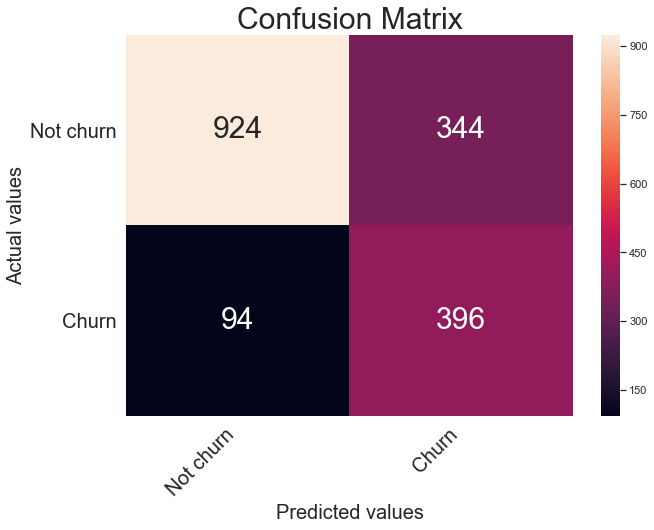

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [40]:
from sklearn.svm import SVC


svm_linear  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

prediction_and_featureImportances(svm_linear, X_train_smote ,X_test ,Y_train_smote ,Y_test, Xcols, "coefficients")

model5 = model_performance_report(svm_linear, X_train_smote ,X_test ,Y_train_smote ,Y_test, "SVM (Linear)")


-  
### Using Radial basis function kernel

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.82      0.86      0.84      1268
          1       0.58      0.51      0.55       490

avg / total       0.75      0.76      0.76      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.7622298065984073
Area under curve :  0.6855388527650809 

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


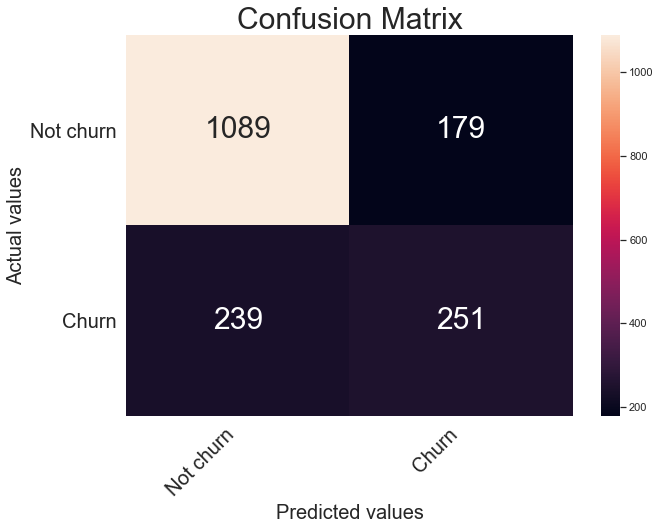

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [41]:
svm_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)


prediction_and_featureImportances(svm_rbf, X_train_smote ,X_test ,Y_train_smote ,Y_test, Xcols, None)

model6 = model_performance_report(svm_rbf, X_train_smote ,X_test ,Y_train_smote ,Y_test, "SVM (Radial)")


# Random Forest

C:\Users\Yash Shinge\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.91      0.69      0.79      1268
          1       0.51      0.82      0.63       490

avg / total       0.80      0.73      0.74      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.729806598407281
Area under curve :  0.757601557973347 

-----------------------------------------------------------------------------

Feature Importance

  

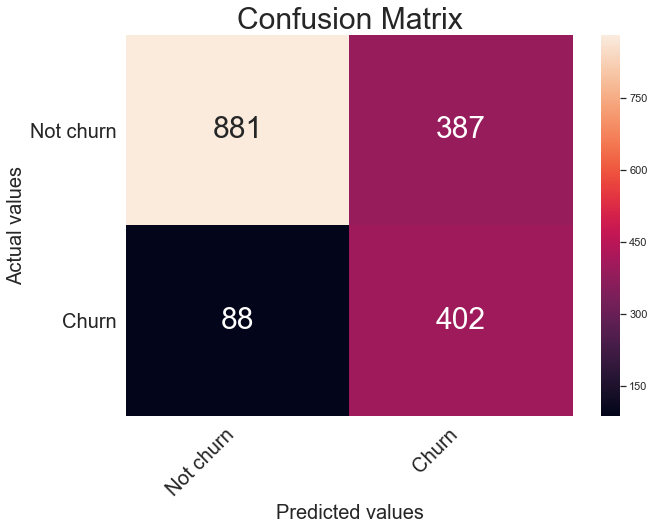

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc   = RandomForestClassifier(n_estimators = 300,  max_depth = 3, criterion ='entropy')
                                      
prediction_and_featureImportances(rfc, X_train_smote , X_test, Y_train_smote, Y_test, Xcols,"features")

model7 = model_performance_report(rfc, X_train_smote ,X_test ,Y_train_smote ,Y_test, "Random Forest")


# Boosting method
## XG Boost ( eXtreme Gradient Boosting)

C:\Users\Yash Shinge\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
-----------------------------------------------------------------------------

 Classification report : 
              precision    recall  f1-score   support

          0       0.83      0.85      0.84      1268
          1       0.59      0.53      0.56       490

avg / total       0.76      0.76      0.76      1758

-----------------------------------------------------------------------------
Accuracy   Score :  0.764505119453925
Area under curve :  0.6933770037983648 

-----------------------------------------------------------------------------

Feature Importance

    coefficients                   

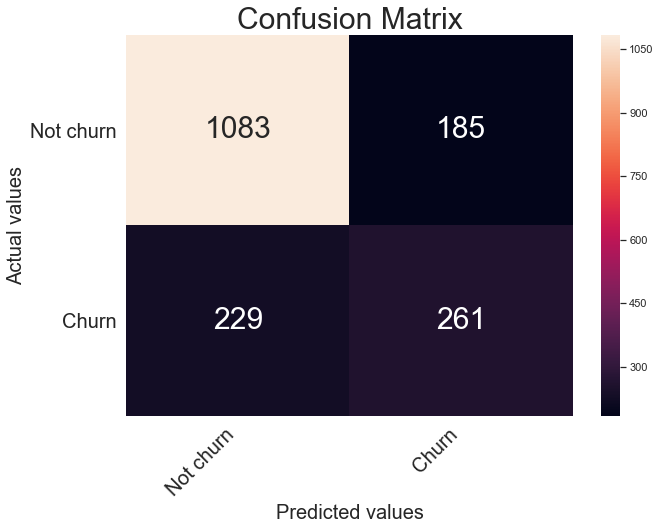

-----------------------------------------------------------------------------
This is the format of your plot grid:
[ (1,1) x1,y1 ]



C:\Users\Yash Shinge\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [43]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

prediction_and_featureImportances(xgbc, X_train_smote ,X_test ,Y_train_smote ,Y_test, Xcols, "features")      

model8 = model_performance_report(xgbc, X_train_smote ,X_test ,Y_train_smote ,Y_test, "XG Boost")


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _#

# Model performance comparison

In [44]:
all_model_performance = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8],axis = 0).reset_index()

all_model_performance = all_model_performance.drop(columns = "index",axis = 1)

model_comparision  = ff.create_table(np.round(all_model_performance,4))

py.iplot(model_comparision)

In [45]:
def compare(metric,color,df) :
    tracer = go.Bar(x = df["Model"] ,
                    y = df[metric],
                    orientation = "v",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model Performance Comparision",
                        plot_bgcolor  = "rgb(243,243,243)",
                        
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=2,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Metric",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100),
                        height = 550
                       )
                  )


trace1  = compare("Accuracy_score","darkorange",all_model_performance)
trace2  = compare("AUC_ROC", 'lightyellow',all_model_performance)
trace3  = compare('Recall_score',"green",all_model_performance)
trace4  = compare('Precision',"red",all_model_performance)
trace5  = compare('f1_score',"blue",all_model_performance)


comparisionPlot = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=comparisionPlot,layout=layout)
py.iplot(fig)

### We select the models with f1 score more than 0.6

In [46]:
best_performance = all_model_performance.loc[all_model_performance['f1_score'] >= 0.6]

In [47]:
layout = go.Layout(dict(title = "Best Models Comparision",
                        plot_bgcolor  = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=2,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Metric",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100),
                        height = 580
                       )
                  )


trace1  = compare("Accuracy_score","darkorange",best_performance)
trace2  = compare("AUC_ROC", 'lightyellow',best_performance)
trace3  = compare('Recall_score',"green",best_performance)
trace4  = compare('Precision',"red",best_performance)
trace5  = compare('f1_score',"blue",best_performance)


bestcomparisionPlot = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=bestcomparisionPlot,layout=layout)
py.iplot(fig)

# Confusion matrices of Best Models

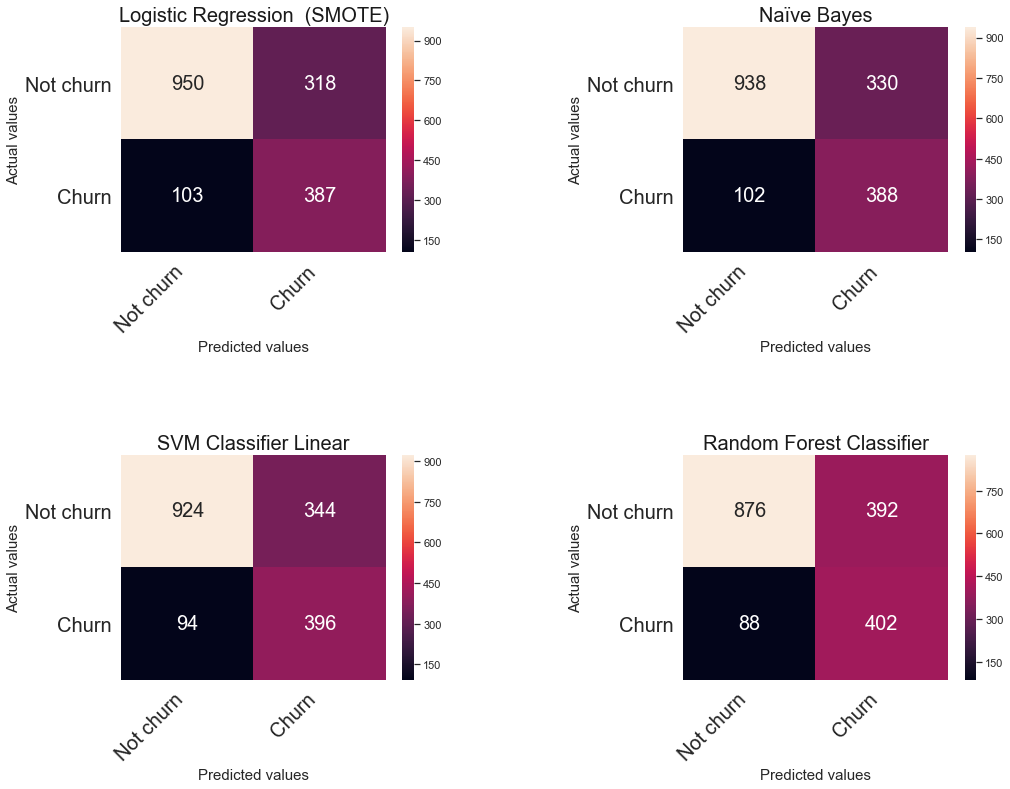

In [48]:
best    = [logReg_smote,naiveBayes,svm_linear,rfc]

models   = ['Logistic Regression  (SMOTE)',
          "Naïve Bayes",
          'SVM Classifier Linear','Random Forest Classifier']

fig = plt.figure(figsize=(16,12))

for i,j,k in itertools.zip_longest(best,range(len(best)),models) :
    
    plt.subplot(2,2,j+1)
    predictions = i.predict(X_test)
    cm = confusion_matrix(Y_test,predictions)
    heatmap = sns.heatmap(cm, annot=True, fmt="d",annot_kws={"size": 20})
    heatmap.yaxis.set_ticklabels( ["Not churn","Churn"], rotation=0, ha='right', fontsize=20)
    heatmap.xaxis.set_ticklabels( ["Not churn","Churn"], rotation=45, ha='right', fontsize=20)
    plt.ylabel('Actual values',fontsize=15)
    plt.xlabel('Predicted values',fontsize=15)
    
    plt.title(k,color = "k", fontsize = 20)
    plt.subplots_adjust(wspace = .7,hspace = .9)
    

- 
### Random forest has the best recall rate, i.e it has the least false negatives. Thus, if our main concern  is to get minimum number of false negatives,( i.e cancelling customers wrongly classified as the one who didn't cancel ) then random forest would be best. 
- 
###  But sometimes we want to balance the false negatives and false positives, i.e we don't want to give off too much of precision for recall, in such case, Logistic regression with SMOTE would be the best option as the false values are balanced.

- 
### Another thing to notice is that the all time great performer XGBoost couldn't do any better than these models. This is great lesson for us that sometimes simple and light algorithms like Logistic regression can do the work and we don't always need computationally expensive models for better performance.

- 
###  Finally talking about important features, we consider the importance features from the logistic regression with SMOTE results. As, we have seen, the columns tenure, contract, internet service, online security , are of most importance.

- 
### Thus, we need to focus on these features, take feedback from customers  and find out the root cause why customers are cancelling the service, and then make suitable changes to improve the service.

